# EEG - Alcohol

## Merge dữ liệu

### 1. Merge dữ liệu cho tập train 

In [63]:
import pandas as pd
import glob
import os

In [64]:
path = './Alcoholics/SMNI_CMI_TRAIN/Train'
all_file = glob.glob(os.path.join(path, "*.csv"), recursive=True)

In [65]:
print(f"there'r {len(all_file)} files in {path} folder")

there'r 468 files in ./Alcoholics/SMNI_CMI_TRAIN/Train folder


In [66]:
df_list = []

for file in all_file:
    temp = pd.read_csv(file)
    temp['source_file'] = os.path.basename(file)
    df_list.append(temp)
    
df_train_raw = pd.concat(df_list, ignore_index=True)
df_train_raw.shape

(7667712, 11)

Trộn toàn bộ các file lẻ trong path ta có được 7.667.712 dữ liệu với 11 cột

In [67]:
df_train_raw.head()

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time,source_file
0,5,0,FP1,0,-8.921,a,S1 obj,0,co2a0000364,0.000000,Data1.csv
1,6,0,FP1,1,-8.433,a,S1 obj,0,co2a0000364,0.003906,Data1.csv
2,7,0,FP1,2,-2.574,a,S1 obj,0,co2a0000364,0.007812,Data1.csv
3,8,0,FP1,3,5.239,a,S1 obj,0,co2a0000364,0.011719,Data1.csv
4,9,0,FP1,4,11.587,a,S1 obj,0,co2a0000364,0.015625,Data1.csv


### 2. Merge dữ liệu cho tập test

In [68]:
path = './Alcoholics/SMNI_CMI_TEST/Test'
all_file = glob.glob(os.path.join(path, "*.csv"), recursive=True)

In [69]:
print(f"there'r {len(all_file)} files in {path} folder")

there'r 480 files in ./Alcoholics/SMNI_CMI_TEST/Test folder


In [ ]:
df_list = []
for file in all_file:
    temp = pd.read_csv(file)
    temp['source_file'] = os.path.basename(file)
    df_list.append(temp)
df_test_raw = pd.concat(df_list, ignore_index=True)
df_test_raw.shape

(7864320, 11)

Trộn toàn bộ các file trong test, ta có 7.863.320 dữ liệu với 11 cột

In [71]:
df_test_raw.head()

,Unnamed: 0,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time,source_file
0,5,30,FP1,0,-3.550,a,S1 obj,0,co2a0000364,0.000000,Data1.csv
1,6,30,FP1,1,-5.015,a,S1 obj,0,co2a0000364,0.003906,Data1.csv
2,7,30,FP1,2,-5.503,a,S1 obj,0,co2a0000364,0.007812,Data1.csv
3,8,30,FP1,3,-3.550,a,S1 obj,0,co2a0000364,0.011719,Data1.csv
4,9,30,FP1,4,-0.621,a,S1 obj,0,co2a0000364,0.015625,Data1.csv


## Tiền xử lí dữ liệu

In [72]:
df = df_train_raw.copy()

In [73]:
df.isna().sum()

Unnamed: 0            0
trial number          0
sensor position       0
sample num            0
sensor value          0
subject identifier    0
matching condition    0
channel               0
name                  0
time                  0
source_file           0
dtype: int64

Kiểm tra missing: Dữ liệu không có missing value

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7667712 entries, 0 to 7667711
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   trial number        int64  
 2   sensor position     object 
 3   sample num          int64  
 4   sensor value        float64
 5   subject identifier  object 
 6   matching condition  object 
 7   channel             int64  
 8   name                object 
 9   time                float64
 10  source_file         object 
dtypes: float64(2), int64(4), object(5)
memory usage: 643.5+ MB


In [75]:
df.describe()

,Unnamed: 0,trial number,sample num,sensor value,channel,time
count,7.667712e+06,7.667712e+06,7.667712e+06,7.667712e+06,7.667712e+06,7.667712e+06
mean,8.228000e+03,2.480342e+01,1.275000e+02,-2.078947e+00,3.150000e+01,4.980469e-01
std,4.748124e+03,1.935509e+01,7.390028e+01,9.789677e+00,1.847295e+01,2.886730e-01
min,5.000000e+00,0.000000e+00,0.000000e+00,-1.612960e+02,0.000000e+00,0.000000e+00
25%,4.116500e+03,1.000000e+01,6.375000e+01,-6.643000e+00,1.575000e+01,2.490234e-01
50%,8.228000e+03,1.950000e+01,1.275000e+02,-1.638000e+00,3.150000e+01,4.980469e-01
75%,1.233950e+04,3.500000e+01,1.912500e+02,2.543000e+00,4.725000e+01,7.470703e-01
max,1.645100e+04,1.070000e+02,2.550000e+02,4.538470e+02,6.300000e+01,9.960938e-01


Tổ chức lại dữ liệu

- Tính thống kê trong mỗi trial:
    - Mean, std, min, max của tín hiệu trên từng channel

1. Chuẩn hóa lại tên cột, tránh trùng tên trước khi group, gán nhãn cho dữ liệu với 1: Nghiện rượu, 0: không nghiện

In [76]:
df_feature = df.copy()
df_feature['label'] = df_train_raw['subject identifier'].map({'a': 1, 'c': 0})
df_feature.columns = df_feature.columns.str.strip().str.lower().str.replace(" ", "_")
df_feature.rename(columns={'sensor_position': 'channel', 'channel': 'channel_id'}, inplace=True)


2. Nhóm dữ liệu theo channel và source file với các thông số mean - std - min - max của sensor_value

In [77]:
df_features = (df_feature.groupby(['source_file', 'channel'])['sensor_value'].agg(['mean', 'std', 'min', 'max']))
label = df_feature[['source_file', 'label']].drop_duplicates().set_index('source_file')
df_features = df_features.join(label, on='source_file')
df_features = df_features.reset_index()
df_features.head()

,source_file,channel,mean,std,min,max,label
0,Data1.csv,AF1,3.346762,4.672660,-8.494,15.432,1
1,Data1.csv,AF2,3.770840,4.875914,-11.078,14.801,1
2,Data1.csv,AF7,6.015152,9.773413,-16.856,27.578,1
3,Data1.csv,AF8,6.032277,11.563581,-20.762,36.855,1
4,Data1.csv,AFZ,2.837496,4.274873,-10.264,12.197,1


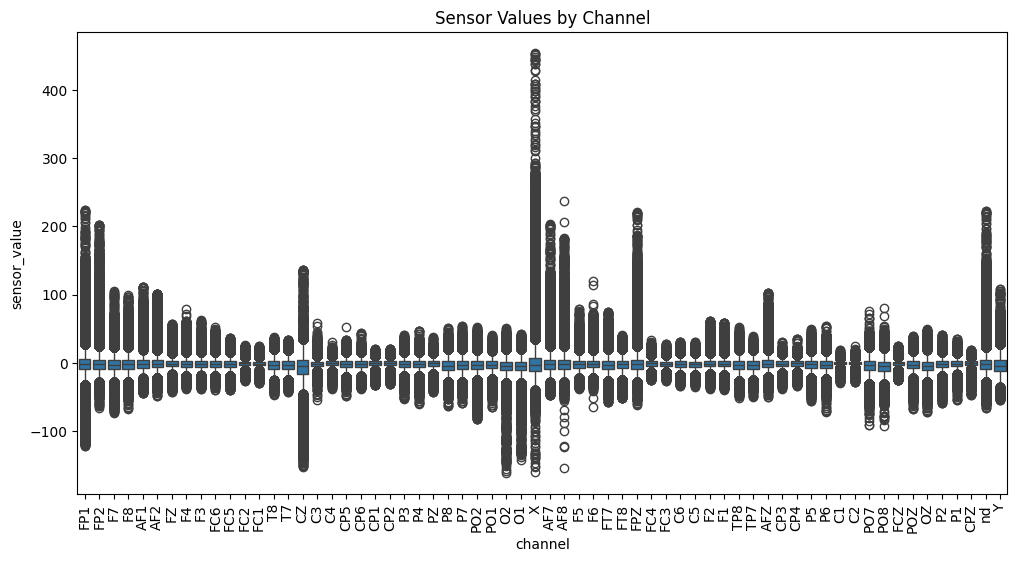

In [78]:
#boxplot to check outliers
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

plt.figure(figsize=(12, 6))
sns.boxplot(x='channel', y='sensor_value', data=df_feature)
plt.title('Sensor Values by Channel')
plt.xticks(rotation=90)
plt.show()

# fig = px.box(df_feature, x='channel', y='sensor_value', title='Sensor Values by Channel')
# fig.show()

***Nhận xét:***

Boxplot của các kênh EEG cho thấy sự tồn tại của nhiều giá trị ngoại lai với biên độ lớn. Tuy nhiên, đây là đặc trưng phổ biến của tín hiệu EEG (Sung điện) - nhiễu nhiều - phi tuyến, nên không được xem là lỗi dữ liệu. Do đó, thay vì loại bỏ các giá trị này, sử dụng RobustScaler nhằm giảm ảnh hưởng của ngoại lai trong quá trình chuẩn hóa, đặc biệt đối với các mô hình nhạy cảm với phân phối dữ liệu.

2.1 Ghi bản ghi duy nhất cho mỗi trial

In [79]:
df_pivot = df_features.pivot(index='source_file', columns='channel', values=['mean', 'std', 'min', 'max'])

In [80]:
df_pivot.columns = ['_'.join(col).strip() for col in df_pivot.columns.values]
df_pivot.reset_index(inplace=True)

In [81]:
label = df_features[['source_file', 'label']].drop_duplicates()
df_pivot = df_pivot.merge(label, on='source_file', how='left')
df_pivot.head()

,source_file,mean_AF1,mean_AF2,mean_AF7,mean_AF8,mean_AFZ,mean_C1,mean_C2,mean_C3,mean_C4,...,max_POZ,max_PZ,max_T7,max_T8,max_TP7,max_TP8,max_X,max_Y,max_nd,label
0,Data1.csv,3.346762,3.770840,6.015152,6.032277,2.837496,3.204363,1.188238,4.087438,1.048434,...,17.171,9.410,19.562,24.923,24.353,8.636,27.445,24.150,19.908,1
1,Data10.csv,3.860496,4.041031,2.117160,4.349398,4.715629,-0.187523,0.494633,0.448223,3.005941,...,11.353,6.521,16.459,23.824,15.778,14.018,27.130,18.087,18.239,1
2,Data100.csv,-1.376488,-1.131687,-2.524676,-0.928871,-1.652395,1.061820,1.883895,-0.132887,2.673453,...,13.285,10.956,14.018,16.683,12.360,17.914,27.425,21.403,20.091,1
3,Data101.csv,-2.548844,-2.553332,-2.528547,-3.697727,-3.153508,-0.354105,-0.362465,-1.121500,-0.999449,...,16.398,17.527,16.042,18.717,16.683,19.928,32.990,29.897,17.344,1
4,Data102.csv,-2.878812,-4.148484,-3.618922,-3.002184,-3.610598,-0.848777,-0.273438,0.303906,0.167234,...,11.576,9.338,10.630,13.519,9.857,8.545,12.187,5.768,13.987,1


In [82]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Columns: 258 entries, source_file to label
dtypes: float64(256), int64(1), object(1)
memory usage: 943.4+ KB


* Kết thúc tiền xử lí

## EDA

1. Kiểm tra phân bố nhãn

In [83]:
df_pivot['label'].value_counts()

label
1    235
0    233
Name: count, dtype: int64

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

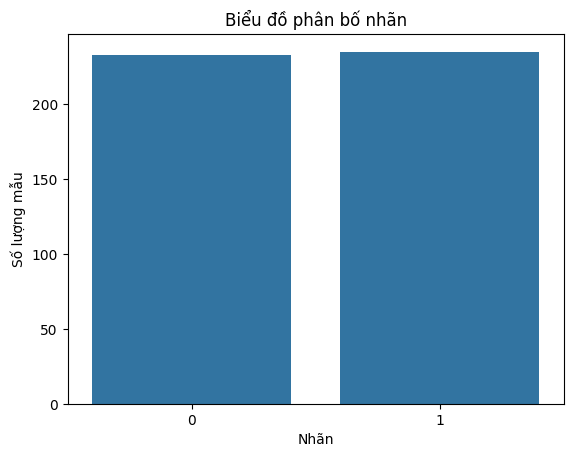

In [85]:
sns.countplot(x='label', data=df_pivot)
plt.title("Biểu đồ phân bố nhãn")
plt.xlabel("Nhãn")
plt.ylabel("Số lượng mẫu")
plt.show()

Nhận xét số lượng nhãn khá cân bằng. Chênh lệch 2 nhãn

2. Phân phối feature theo nhãn

- FCZ (Vùng trán trước)

Theo các thông tin nghiện cứu được khu vực vùng trung tâm trán như FCZ được ưu tiên kiểm tra do liên quan đến các nhiệm vụ ức chế phản ứng, phản ánh cơ chế thần kinh của sự mất kiểm soát

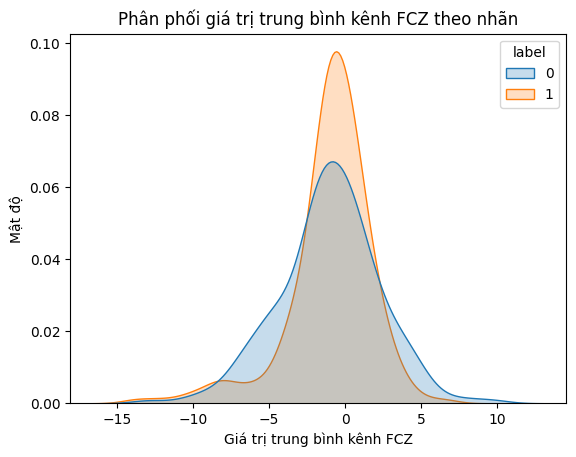

In [86]:
sns.kdeplot(
    data=df_pivot,
    x='mean_FCZ',
    hue='label',
    fill=True,
)
plt.title("Phân phối giá trị trung bình kênh FCZ theo nhãn")
plt.xlabel("Giá trị trung bình kênh FCZ")
plt.ylabel("Mật độ")
plt.show()

* Nhận xét:
    * Nhãn 1 (Nghiện rượu) có xu hướng giá trị FCZ cao do mất kiểm soát thần kinh
    * Chồng lấn nhiều, có outliner
    * Độ lệch và hình dạng tương đối giống nhau
    * Quan hệ phí tuyến giữa các đặc trưng
    * Có thể khai thác tận dụng đa chiều, học được phi tuyến

3. Tương quan các feature

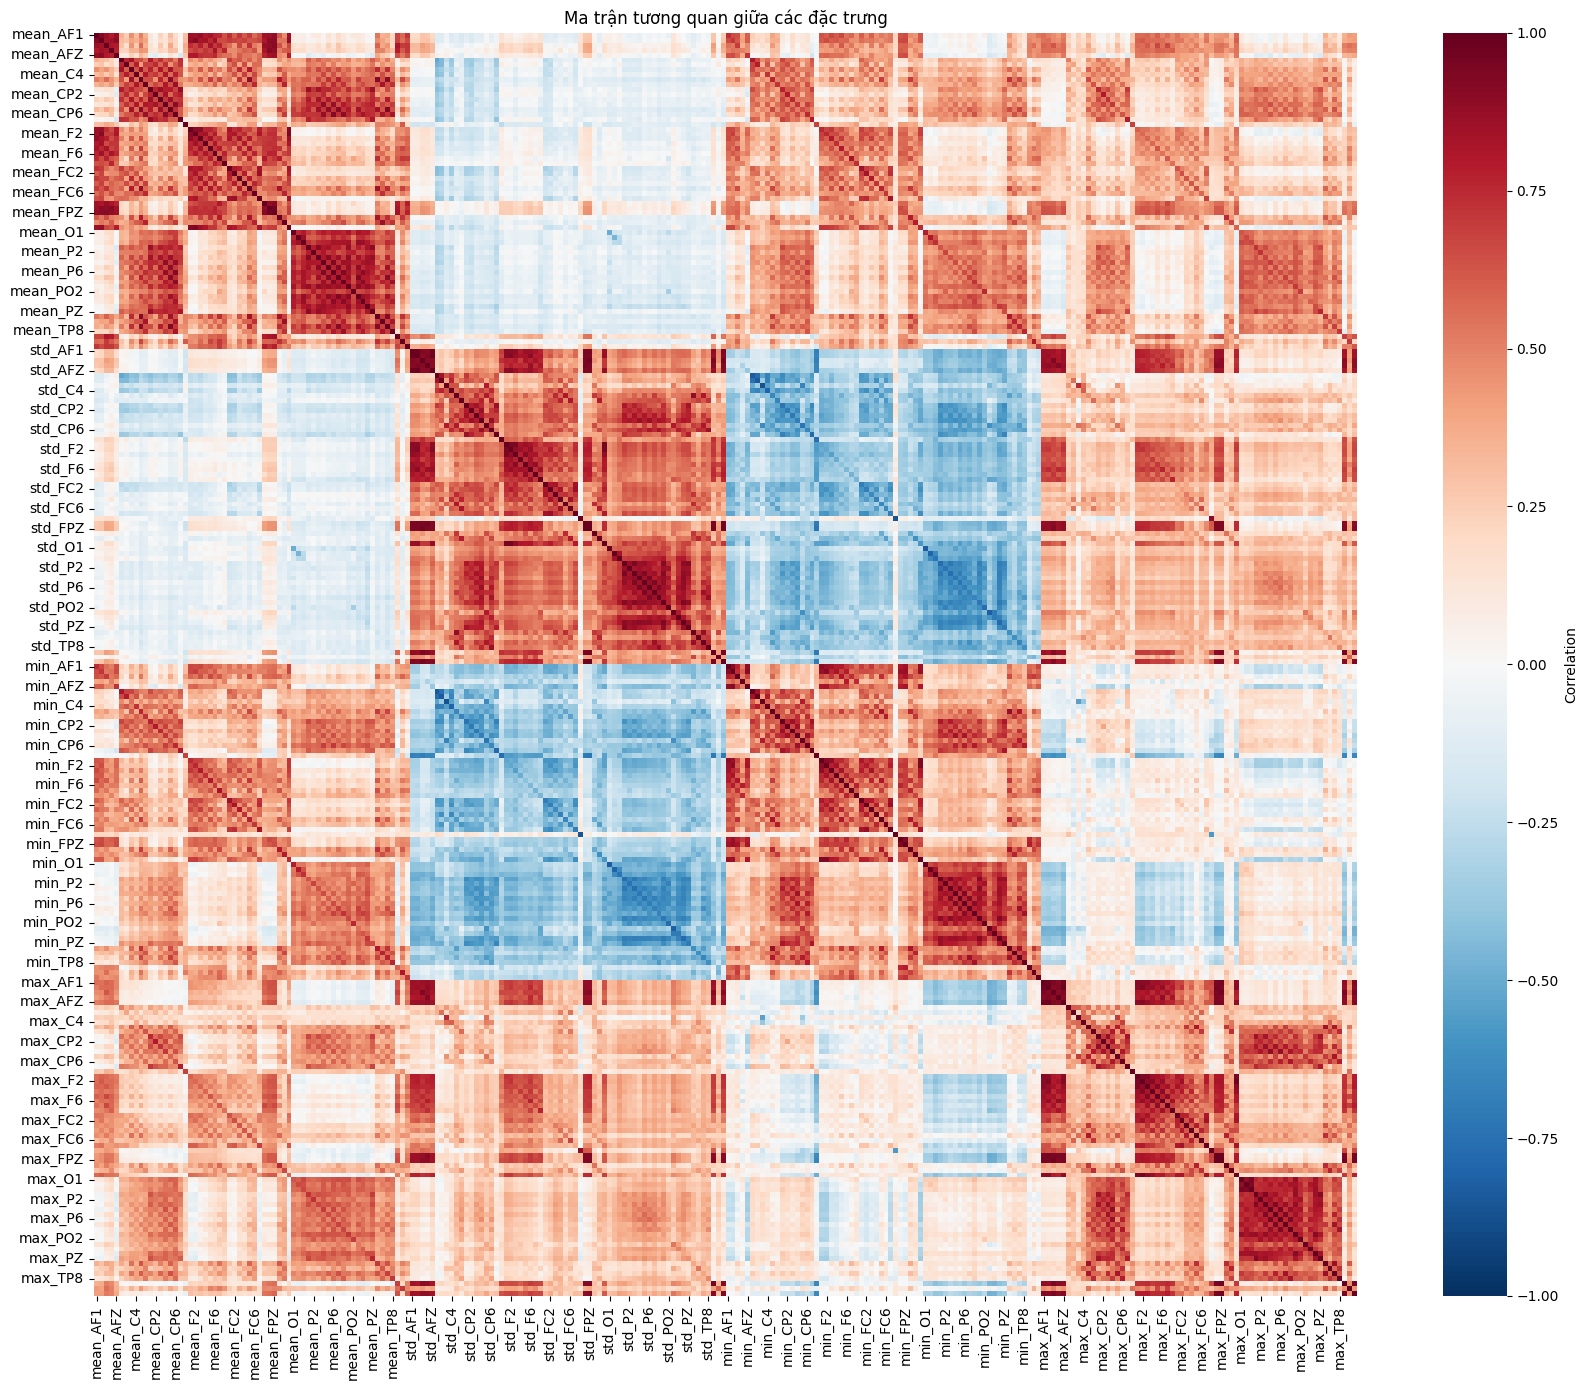

In [132]:
corr = df_pivot.drop(columns=["source_file", "label"]).corr()

plt.figure(figsize=(18, 14))
sns.heatmap(
    corr,
    cmap="RdBu_r",
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0,
    cbar_kws={"label": "Correlation"},
)
plt.title("Ma trận tương quan giữa các đặc trưng")
plt.tight_layout()
plt.show()

* Nhận xét:
    * Có độ tương quan cao
    * Thông tin có khả năng bị dư thừa
    * Không ổn định cho Logistic Regression
    * Không phù hợp cho KNN có thể bị nhiễu
    * Thực hiện giảm chiều PCA

4. Tiến hành giảm chiều dữ liệu để quan sát cấu trúc

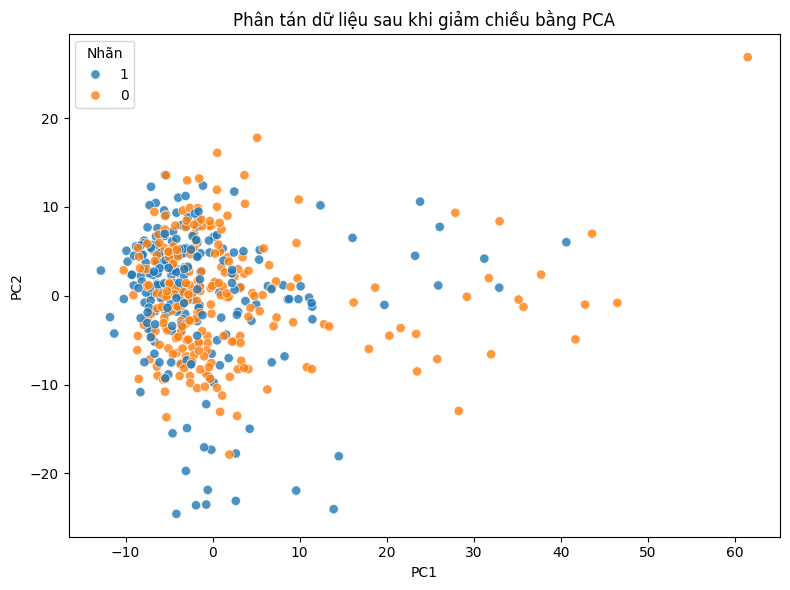

In [130]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

x = df_pivot.drop(columns=["source_file", "label"])
pca_scaler = RobustScaler()
x_scaled = pca_scaler.fit_transform(x)

pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(x_scaled)

pca_df = pd.DataFrame(x_pca, columns=["PC1", "PC2"])
pca_df["label"] = df_pivot["label"].astype(str)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="label", alpha=0.8, s=45)
plt.title("Phân tán dữ liệu sau khi giảm chiều bằng PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Nhãn")
plt.tight_layout()
plt.show()

* Nhận xét:
    * Hai lớp không tách rời rõ ràng
    * Gặp hiện tượng chồng lấn
    * Không tồn tại đường thẳng phân cách rõ

***Nhận định:***

| Đặc điểm | Kết luận |
|---|---|
| Phân bố nhãn | Cân bằng |
| Tính tuyến tính | Không tuyến tính |
| Phân biệt từng feature | Yếu |
| Tương quan đặc trưng | Cao |
| Chiều dữ liệu | Cao |
| Nhiễu | Có |

Qua phân tích phân bố nhãn, dữ liệu EEG không bị mất cân bằng. Tuy nhiên, các đặc trưng đơn lẻ không cho thấy khả năng phân biệt rõ ràng giữa hai nhóm. Ma trận tương quan cho thấy tồn tại đa cộng tuyến mạnh, trong khi biểu đồ PCA cho thấy dữ liệu không tuyến tính phân tách được. Do đó, các mô hình học máy phi tuyến như Random Forest, SVM với kernel RBF và Gradient Boosting được xem là phù hợp nhất cho bài toán phân loại người nghiện rượu dựa trên tín hiệu EEG.

***Hướng mô hình lựa chọn:***

- Random Forest
- XGBoost

***Tiến hành thử nghiệm***

- Logistic Regression
- KNN

## Khai thác mô hình học máy

### 1. Chia tập dữ liệu

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

In [90]:
from sklearn.model_selection import train_test_split

x = df_pivot.drop(columns=['source_file', 'label'])
y = df_pivot['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [91]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


Chia dữ liệu thành 2 tập train và test theo tỉ lệ 70% train và 30% test

### 2. Huấn luyện mô hình

#### 2.1 Random Forest Classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [93]:
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'n_jobs': [-1],
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1}


Tham số random forest tốt nhất:

In [94]:
rf = RandomForestClassifier(max_depth=None, n_estimators=200, min_samples_split=5, n_jobs=-1, random_state=42)

#### 2.2 XGBoost Classifier

In [95]:
from xgboost import XGBClassifier

xbg = XGBClassifier(random_state=42, eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

grid_search_xgb = GridSearchCV(estimator=xbg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(x_train, y_train)
print(f"Best parameters: {grid_search_xgb.best_params_}")
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.6}


Tham số XGBoost Classifier tốt nhất:

In [96]:
xbg = XGBClassifier(random_state=42, eval_metric='logloss', n_estimators=300, max_depth=10, learning_rate=0.05, subsample=0.6, colsample_bytree=1.0)

### 3. Đánh giá và so sánh mô hình

In [97]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [98]:
print(f"Model Random Forest")
y_prob = best_rf.predict_proba(x_test)[:, 1]
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob)}")

Model Random Forest
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        58
           1       0.91      0.72      0.81        83

    accuracy                           0.79       141
   macro avg       0.80      0.81      0.79       141
weighted avg       0.82      0.79      0.80       141

ROC-AUC Score: 0.8907353552139592


In [99]:
print(f"Model XGBoost")
y_prob_xgb = best_xgb.predict_proba(x_test)[:, 1]
print(classification_report(y_test, y_pred_xgb))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_xgb)}")

Model XGBoost
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        58
           1       0.92      0.73      0.82        83

    accuracy                           0.81       141
   macro avg       0.82      0.82      0.81       141
weighted avg       0.83      0.81      0.81       141

ROC-AUC Score: 0.9422517656834234


In [100]:
import plotly.express as px

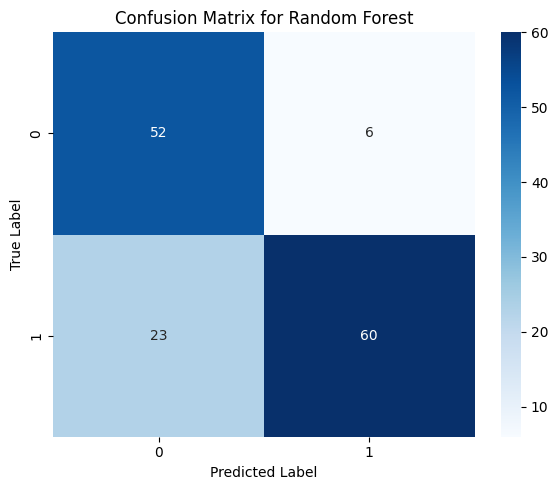

In [129]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=True,
    xticklabels=["0", "1"],
    yticklabels=["0", "1"],
)
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

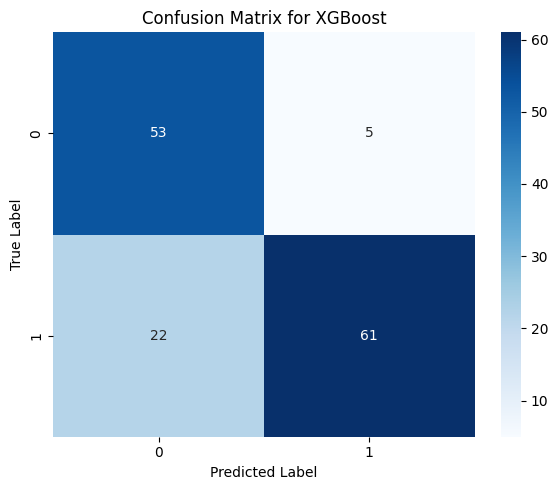

In [128]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=True,
    xticklabels=["0", "1"],
    yticklabels=["0", "1"],
)
plt.title("Confusion Matrix for XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

#### 3.1 Receiver Operating Characteristic (ROC)

* Trục X: False Positive Rate (FPR)
* Trục Y: True Positive Rate (TPR/Recall)

In [103]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [104]:
y_prob_rf = best_rf.predict_proba(x_test)[:, 1]
y_prob_xgb = best_xgb.predict_proba(x_test)[:, 1]

In [105]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

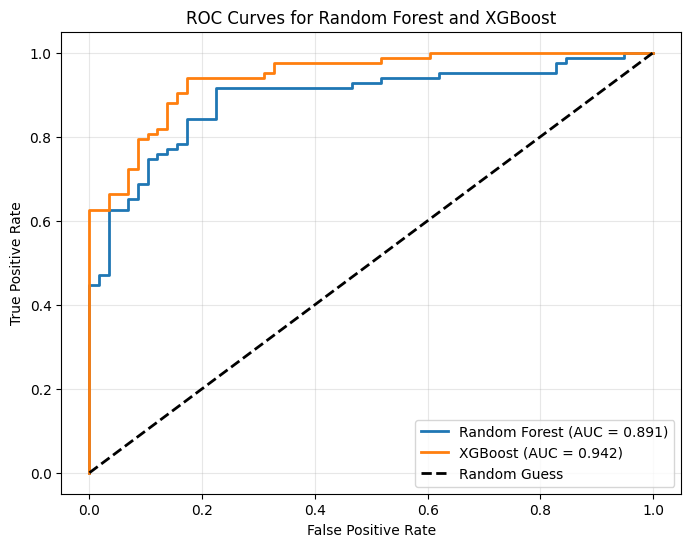

In [106]:
plt.figure(figsize=(8, 6))

plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', linewidth=2)

plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random Forest and XGBoost')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

* Nhận định:
    * Giá trị AUC:
        * Random Forest: 0.891
        * XGBoost: 0.942
    -> Mô hình XGBoost hơn RF ~0.051

EDA cho thấy dữ liệu EEG có mối quan hệ phi tuyến và nhiều đặc trưng tương quan. XGBoost, với cơ chế boosting và khả năng học từ lỗi của các cây trước, khai thác hiệu quả hơn các pattern phức tạp này so với Random Forest.

***Nhận xét:***

Cả hai mô hình đều đạt hiệu năng cao với AUC lần lượt là 0.891 và 0.942. Trong đó, XGBoost thể hiện khả năng phân biệt vượt trội hơn, đặc biệt ở vùng false positive rate thấp. Điều này cho thấy XGBoost phù hợp hơn cho bài toán phân loại người nghiện rượu dựa trên tín hiệu EEG, nơi các mối quan hệ phi tuyến và nhiễu đóng vai trò quan trọng.

### 3.2 Phân tích Feature

##### 3.2.1 Feature quan trọng

In [107]:
feature_imp = pd.DataFrame({
    'feature': x.columns,
    'importance_xgb': best_xgb.feature_importances_,
}).sort_values(by='importance_xgb', ascending=False)
feature_imp.head()

,feature,importance_xgb
74,std_C6,0.023105
109,std_P3,0.022911
240,max_P6,0.016974
141,min_CP3,0.013516
247,max_POZ,0.013188


In [108]:
feature_imp['channel'] = feature_imp['feature'].apply(lambda x: x.split('_')[-1])

channel_imp = feature_imp.groupby('channel')['importance_xgb'].sum().sort_values(ascending=False)
channel_imp.head()

channel
C6     0.036398
P3     0.034191
CP3    0.030530
POZ    0.028658
C2     0.028442
Name: importance_xgb, dtype: float32

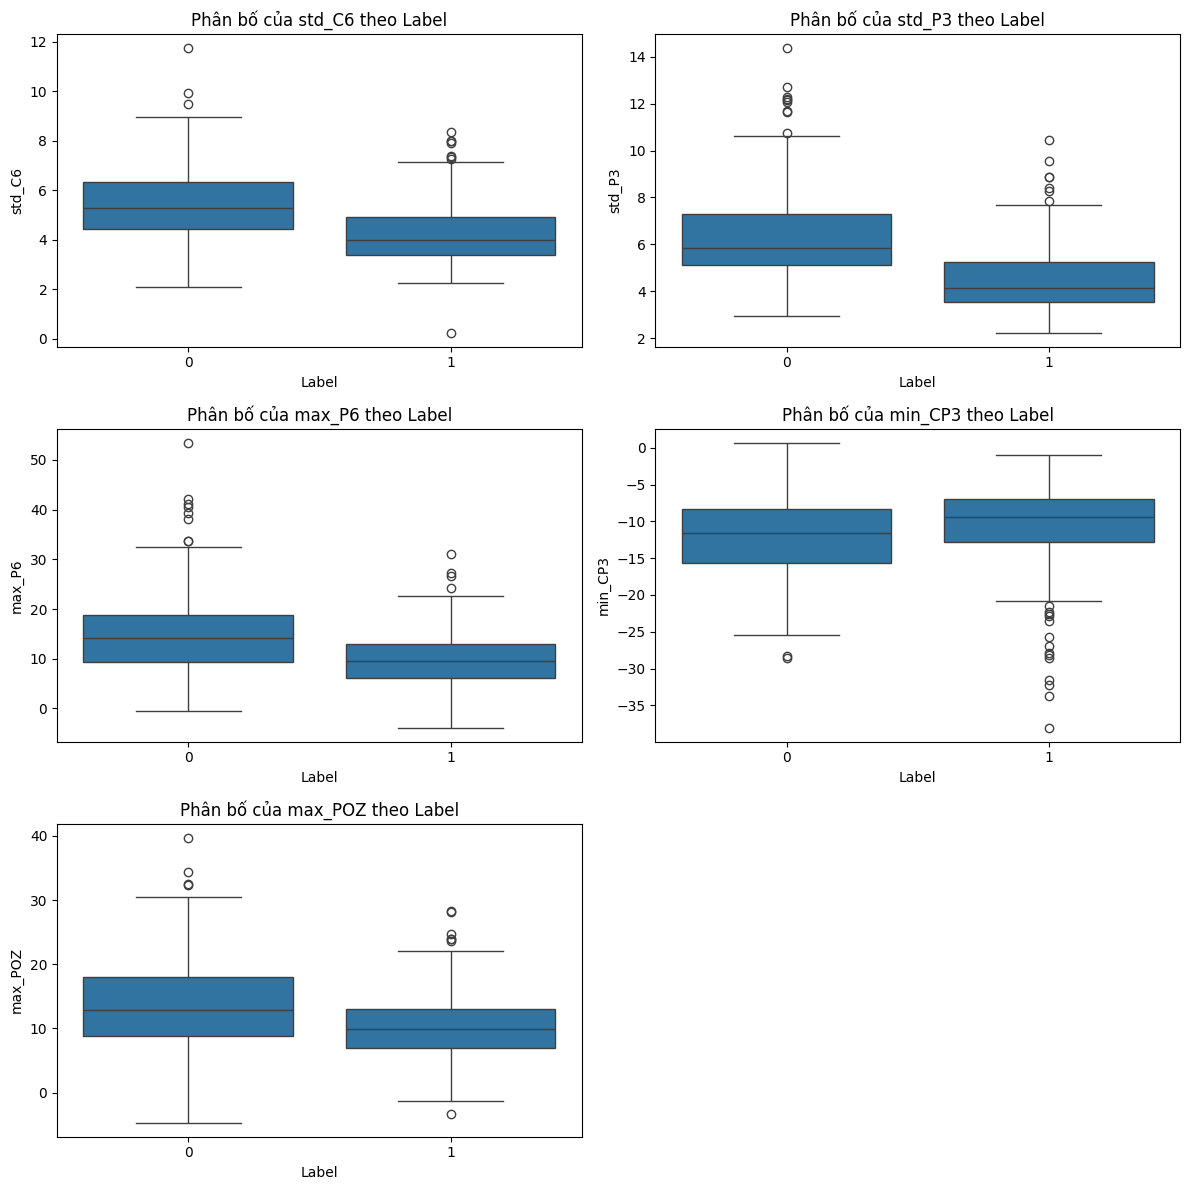

In [109]:
imp_features = feature_imp['feature'].head(5).tolist()
n_cols = 2
n_rows = (len(imp_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten() if n_rows > 1 else [axes]

for i, feat in enumerate(imp_features):
    sns.boxplot(x='label', y=feat, data=df_pivot, ax=axes[i])
    axes[i].set_title(f'Phân bố của {feat} theo Label')
    axes[i].set_xlabel('Label')
    axes[i].set_ylabel(feat)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

***Đánh giá chung***

***2. std_C6 – Độ biến thiên tín hiệu vùng C6 (central)***


* Quan sát

    * Label 0 (Control):

        * Median cao hơn

        * IQR rộng

        * Nhiều outlier phía trên

    * Label 1 (Alcoholic):

        * Median thấp hơn

        * Phân phối hẹp hơn

* Diễn giải

    * Người không nghiện:

        * Hoạt động não linh hoạt hơn

    * Người nghiện:

        * Biến thiên thấp hơn → giảm đáp ứng thần kinh


=> Người nghiện có thiên hướng sung thần kinh thấp hơn, trong khi người không nghiện cho sung thần kinh linh hoạt hơn

=> Alcoholism có thể làm suy giảm tính linh hoạt của hoạt động thần kinh ở vùng trung tâm.


***2. std_P3 – Độ biến thiên vùng P3 (parietal)***



* Quan sát

    * Control:

        * Median cao

        * Rất nhiều outlier lớn

    * Alcoholic:

        * Median thấp rõ rệt

        * Phân phối co hẹp

* Diễn giải

    * Vùng P3 liên quan:

        * xử lý nhận thức

        * tích hợp thông tin



=> Người nghiện rượu có tín hiệu EEG kém biến thiên hơn ở vùng liên quan đến xử lý nhận thức → phản ánh suy giảm cognitive processing.

***3. max_P6 – Biên độ cực đại vùng P6***

* Quan sát

    * Control:

        * Max lớn hơn rõ rệt

        * Nhiều giá trị cực trị cao

    * Alcoholic:

        * Max thấp hơn

        * Ít spike lớn

* Diễn giải

    * Biên độ lớn:

        * phản ánh phản ứng não mạnh

    * Alcoholic:

        * giảm khả năng phản ứng cực đại

=> Alcoholic thể hiện khả năng phản hồi thần kinh kém hơn trước kích thích.

***4. min_CP3 – Biên độ cực tiểu vùng CP3***

* Quan sát

    * Alcoholic:

        * Min thấp hơn nhiều (âm sâu hơn)

    Nhiều outlier âm mạnh

    * Control:

        * Phân phối ổn định hơn

* Diễn giải

    * Biên độ âm sâu:

        * dấu hiệu hoạt động bất thường / mất kiểm soát

    * Alcoholic:

        * xuất hiện nhiều dao động cực đoan

=> Người nghiện rượu có xu hướng xuất hiện các dao động EEG cực đoan hơn ở vùng cảm giác–vận động.

***5. max_POZ – Biên độ cực đại vùng đỉnh***

* Quan sát

    * Control:

        * Median và max cao hơn

    * Alcoholic:

        * Phân phối thấp và hẹp

* Diễn giải

    * Vùng POZ:

        * xử lý thị giác – phản xạ

    * Alcoholic:

        * giảm hoạt động phản xạ thị giác

=> Alcoholism ảnh hưởng đến khả năng xử lý tín hiệu thị giác và phản xạ.

##### Đặc tính EEG của người nghiện rượu



#####  Người nghiện rượu (Alcoholic – Label 1)
-  Độ biến thiên thấp (**std\_*** ↓)
-  Biên độ cực đại thấp (**max\_*** ↓)
-  Biên độ cực tiểu sâu hơn (**min\_*** ↓↓)

####  Ảnh hưởng rõ tại:
- Parietal (**P3, P6**)
- Central–Parietal (**CP3**)
- Occipital–Parietal (**POZ**)

=> **Phản ánh:**
- Suy giảm phản ứng thần kinh  
- Giảm linh hoạt  
- Xuất hiện dao động bất thường  




####  Người không nghiện (Control – Label 0)
-  Biến thiên EEG cao hơn
-  Phản ứng mạnh hơn (**max lớn**)
-  Phân phối rộng → não hoạt động linh hoạt


## Mở rộng thử nghiệm:

### 1. Mở rộng thử nghiệm với ***Logistic Regression***:

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
lr = LogisticRegression(random_state=42, max_iter=3000, solver='liblinear')
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)
y_prob_lr = lr.predict_proba(x_test)[:, 1]

### 2. Mở rộng thử nghiệm với ***K Nearest Neighbor:***

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)
grid_search_knn.fit(x_train, y_train)

print(f"Best parameters for KNN: {grid_search_knn.best_params_}")

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)
y_prob_knn = best_knn.predict_proba(x_test)[:, 1]

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters for KNN: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


### 3. Đánh giá và so sánh mô hình

In [114]:
acc_knn = best_knn.score(x_test, y_test)
print(f"KNN Accuracy: {acc_knn}")
print(f"KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8014184397163121
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.74      0.75        58
           1       0.82      0.84      0.83        83

    accuracy                           0.80       141
   macro avg       0.80      0.79      0.79       141
weighted avg       0.80      0.80      0.80       141



* Đối với Nhóm Nghiện rượu (Class 1 – Alcoholic):

    * Precision (Độ chính xác dự báo đúng người nghiện rượu): 0.82
        * Nghĩa là trong số những người mà mô hình dự đoán là "Nghiện rượu", có 82% thực sự đúng. Tuy nhiên vẫn còn khoảng 18% là báo động giả (người bình thường nhưng bị dự đoán nhầm là nghiện rượu).

    * Recall (Độ nhạy): 0.84
        * Mô hình phát hiện đúng 84% số người nghiện rượu thật sự.
    Điều này cũng có nghĩa là vẫn còn khoảng 16% người nghiện rượu bị bỏ sót, không được mô hình phát hiện.

    * Ý nghĩa thực tế:
        * Mô hình có khả năng nhận diện nhóm nghiện rượu tương đối tốt nhưng vẫn chưa đủ mạnh để áp dụng trong các hệ thống yêu cầu độ tin cậy cao. Vẫn tồn tại tỷ lệ bỏ sót bệnh nhân và dự báo nhầm người khỏe mạnh ở mức đáng kể.

* Đối với Nhóm Đối chứng (Class 0 – Control / Người bình thường):

    * Precision: 0.77
        * Trong số những người được dự đoán là "Bình thường", chỉ có khoảng 77% là đúng, còn lại gần 23% bị dự đoán sai (thực tế là nghiện rượu nhưng bị gán nhầm là bình thường).

    * Recall: 0.74
        * Mô hình chỉ nhận diện đúng 74% số người bình thường thực sự, tức là vẫn có gần 26% người bình thường bị nhầm thành nghiện rượu.

    * Ý nghĩa thực tế:
        * Khả năng phân biệt người bình thường của mô hình chưa tốt. Đây là điểm yếu lớn nếu bài toán yêu cầu hạn chế tối đa việc “gán nhầm bệnh” cho người khỏe mạnh.

In [115]:
acc_lr = lr.score(x_test, y_test)
print(f"Logistic Regression Accuracy: {acc_lr}")
print(f"Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.950354609929078
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        58
           1       0.99      0.93      0.96        83

    accuracy                           0.95       141
   macro avg       0.95      0.96      0.95       141
weighted avg       0.95      0.95      0.95       141



* Đối với Nhóm Nghiện rượu (Class 1 - Alcoholic):

    * Precision (Độ chính xác dự báo) = 0.99 (Gần như tuyệt đối):
        * Đây là chỉ số ấn tượng nhất của mô hình. Trong số những người mà mô hình dự đoán là "Nghiện rượu", có tới 99% là chính xác.

    * Ý nghĩa thực tế:
        * Mô hình có độ tin cậy cực cao trong khẳng định bệnh. Rất hiếm khi xảy ra trường hợp "báo động giả" (người khỏe mạnh bị gán nhầm mác nghiện rượu)

    * Recall (Độ nhạy) = 0.93:
        * Mô hình phát hiện được 93% số người nghiện rượu thực tế. Chỉ có khoảng 6% số bệnh nhân bị bỏ sót

* Đối với Nhóm Đối chứng (Class 0 - Control):
    * Recall = 0.98:
        * Mô hình nhận diện chính xác 98% người bình thường. Gần như không có người bình thường nào bị mô hình nhầm lẫn



***Đánh giá tổng thể***

* Logistic Regression mạnh hơn KNN rõ rệt
* Phân loại ổn định hơn, chính xác hơn, rủi ro thấp hơn

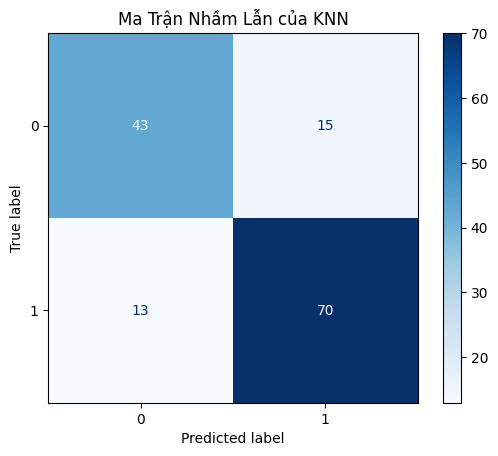

In [116]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Ma Trận Nhầm Lẫn của KNN")
plt.show()

* Dựa trên biểu đồ Heatmap, ta thấy sự phân bố cụ thể:
    * Dự đoán Đúng (Đường chéo chính):
        * 43 trường hợp Người bình thường (True Negative)
        * 70 trường hợp Người nghiện rượu (True Positive)
    * Dự đoán SAI (Đường chéo phụ):
        * 15 người không nghiện rượu nhưng bị gán nhầm thành nghiện rượu.

* Con số này khá cao nếu so với Logistic Regression (chỉ có 1 FP).
* → Điều này khiến Precision của class 1 (0.82) giảm xuống vì mô hình “gắn nhãn nghiện rượu” cho khá nhiều người bình thường.

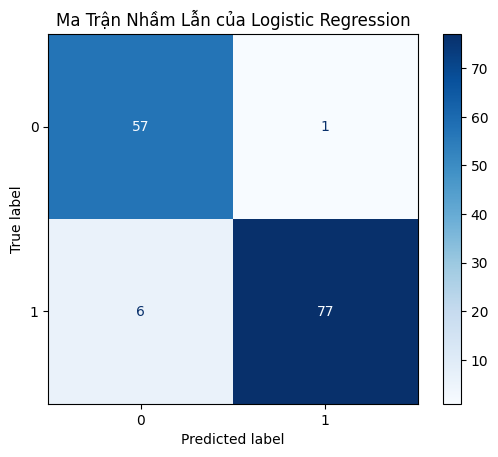

In [117]:
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Ma Trận Nhầm Lẫn của Logistic Regression")
plt.show()

- Dựa trên biểu đồ Heatmap, ta thấy sự phân bố cụ thể:
    - Dự đoán ĐÚNG (Đường chéo chính):
        * 57 trường hợp Người bình thường (True Negative)
        * 77 trường hợp Người nghiện rượu (True Positive)

    - Phần lớn dữ liệu tập trung ở đây.
        * Dự đoán SAI (Đường chéo phụ):False Positive (Báo động giả): Chỉ có 1 trường hợp. (1 người bình thường bị nhầm là nghiện rượu). Con số này cực thấp, củng cố cho chỉ số Precision 0.99 ở trên.
        * False Negative (Bỏ sót bệnh): 6 trường hợp. (6 người nghiện rượu nhưng máy dự đoán là bình thường). Đây là điểm duy nhất mô hình cần cải thiện, tuy nhiên con số này vẫn ở mức chấp nhận được.

#### 3.1 Đánh giá 4 mô hình

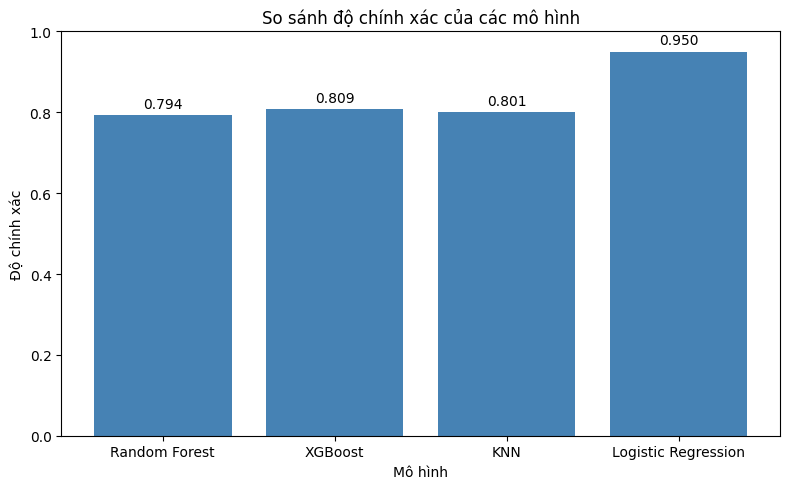

In [127]:
models = ['Random Forest', 'XGBoost', 'KNN', 'Logistic Regression']

accuracies = [
    best_rf.score(x_test, y_test),
    best_xgb.score(x_test, y_test),
    acc_knn,
    acc_lr,
]

df_acc = pd.DataFrame({'Model': models, 'Accuracy': accuracies})

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(df_acc['Model'], df_acc['Accuracy'], color='steelblue')

ax.set_title("So sánh độ chính xác của các mô hình")
ax.set_xlabel("Mô hình")
ax.set_ylabel("Độ chính xác")
ax.set_ylim(0, 1)

for bar, v in zip(bars, df_acc['Accuracy']):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        v + 0.01,
        f"{v:.3f}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.xticks(ha='center')
plt.tight_layout()
plt.show()

Accuracy của Logistic Regression cực cao, cao hơn mức mong đợi, khi trước đó đã dữ đoán mô hình này không quá phù hợp với kiểu dữ liệu nhiều nhiễu như EEG

In [123]:
import plotly.graph_objects as go
labels = ['Precision', 'Recall', 'F1-Score']
precision_knn, recall_knn, f1_knn, _ = classification_report(y_test, y_pred_knn, output_dict=True)[ '1'].values()
precision_lr, recall_lr, f1_lr, _ = classification_report(y_test, y_pred_lr, output_dict=True)[ '1'].values()
precision_rf, recall_rf, f1_rf, _ = classification_report(y_test, best_rf.predict(x_test), output_dict=True)[ '1'].values()
precision_xgb, recall_xgb, f1_xgb, _ = classification_report(y_test, best_xgb.predict(x_test), output_dict=True)[ '1'].values()


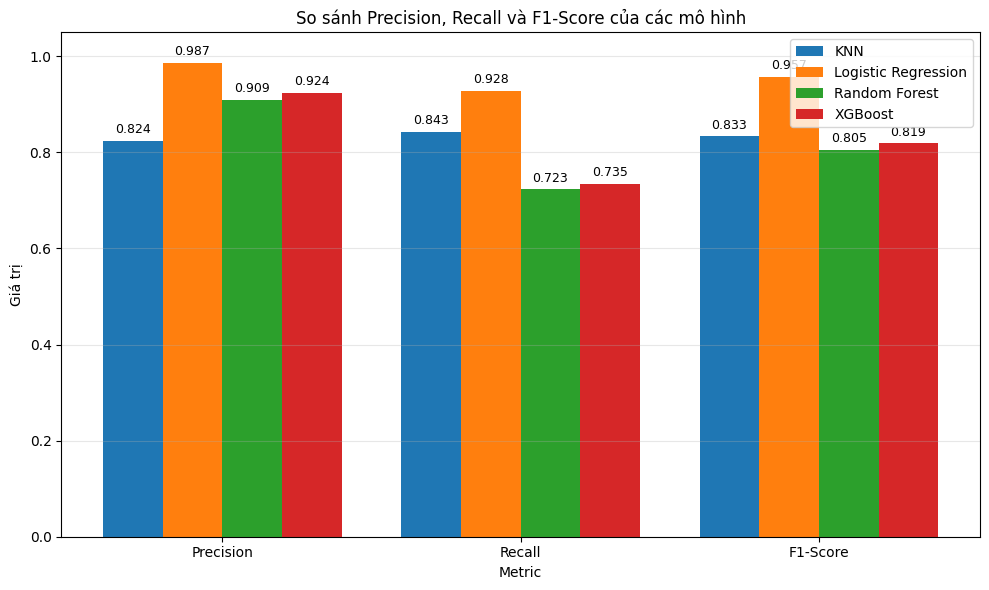

In [124]:
import numpy as np

models = ['KNN', 'Logistic Regression', 'Random Forest', 'XGBoost']
metrics = labels

values = np.array([
    [precision_knn, recall_knn, f1_knn],
    [precision_lr,  recall_lr,  f1_lr],
    [precision_rf,  recall_rf,  f1_rf],
    [precision_xgb, recall_xgb, f1_xgb],
])

x = np.arange(len(metrics))
bar_w = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

for i, model in enumerate(models):
    bars = ax.bar(x + (i - (len(models) - 1) / 2) * bar_w, values[i], width=bar_w, label=model)
    for b, v in zip(bars, values[i]):
        ax.text(b.get_x() + b.get_width() / 2, b.get_height() + 0.01, f"{v:.3f}",
                ha="center", va="bottom", fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.05)
ax.set_title("So sánh Precision, Recall và F1-Score của các mô hình")
ax.set_xlabel("Metric")
ax.set_ylabel("Giá trị")
ax.legend()
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

Logistic Regression không chỉ đạt Accuracy cao mà còn duy trì Precision – Recall cân bằng

In [120]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
auc_knn = auc(fpr_knn, tpr_knn)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = auc(fpr_lr, tpr_lr)


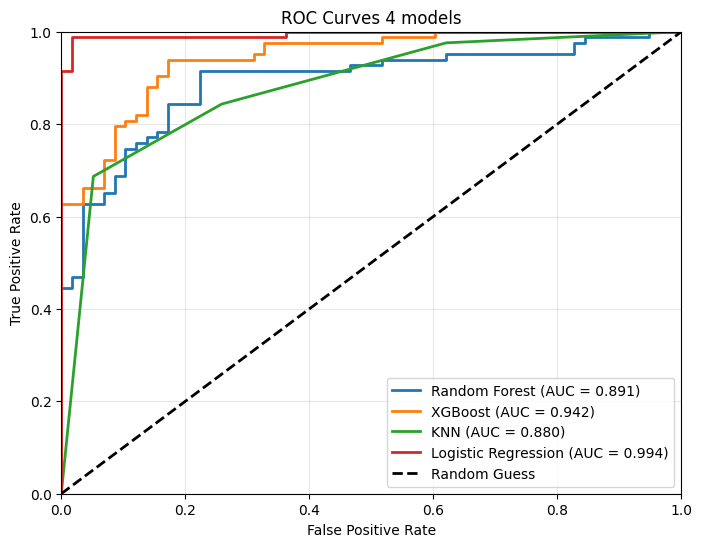

In [122]:
plt.figure(figsize=(8, 6))

plt.plot(fpr_rf, tpr_rf, linewidth=2, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot(fpr_xgb, tpr_xgb, linewidth=2, label=f"XGBoost (AUC = {auc_xgb:.3f})")
plt.plot(fpr_knn, tpr_knn, linewidth=2, label=f"KNN (AUC = {auc_knn:.3f})")
plt.plot(fpr_lr, tpr_lr, linewidth=2, label=f"Logistic Regression (AUC = {auc_lr:.3f})")

plt.plot([0, 1], [0, 1], "k--", linewidth=2, label="Random Guess")

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves 4 models")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

plt.show()


mô hình Logistic Regression phân tách hai lớp tốt nhất

## ***Kết luận***

Kết quả sau kiểm thử với 4 mô hình, cho thấy Logistic Regression cho kết quả ngoài mong đợi, là mô hình cho kết quả tốt nhất trong 4 mô hình.

Đây là mô hình tối ưu nhất cho bài toán phân loại alcoholic và control dựa trên dữ liệu EEG này